In [2]:
import numpy as np

import sympy as smp
from sympy.vector import *

from sympy import *

import matplotlib.pyplot as plt

from scipy.integrate import quad
from scipy.integrate import quad_vec

In [3]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

# Vectors and Geometry

###### Numerical or Symbolic

In [4]:
a = np.array([1, 2, 3])
b = np.array([7, 8, 9])

In [5]:
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [6]:
u

Matrix([
[u_1],
[u_2],
[u_3]])

In [7]:
v

Matrix([
[v_1],
[v_2],
[v_3]])

In [8]:
u.subs([(u1, 3)])

Matrix([
[  3],
[u_2],
[u_3]])

In [9]:
m = smp.Matrix([[1, 2, 1], [2, 1, 2], [1, 0, 1]])
m

Matrix([
[1, 2, 1],
[2, 1, 2],
[1, 0, 1]])

#### Calling Matrix Entries

In [10]:
m[0,0]

1

In [11]:
m[2,2]

1

In [12]:
m[2,1]

0

In [13]:
n = smp.Matrix([[1, 2],[1, 2],[1, 2]])
n

Matrix([
[1, 2],
[1, 2],
[1, 2]])

In [14]:
m*n

Matrix([
[4,  8],
[5, 10],
[2,  4]])

In [15]:
shape(m)

(3, 3)

In [16]:
shape(n)

(3, 2)

In [17]:
shape(m*n)

(3, 2)

### Identity Matrix

In [18]:
eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

# Addition

In [19]:
2*a+b

array([ 9, 12, 15])

In [20]:
2*u+v

Matrix([
[2*u_1 + v_1],
[2*u_2 + v_2],
[2*u_3 + v_3]])

# Dot Product

In [21]:
np.dot(a, b)4

SyntaxError: invalid syntax (2630247196.py, line 1)

In [ ]:
u.dot(v)

# Cross Product

In [ ]:
np.cross(a, b)

In [ ]:
u.cross(v)

# Vector Magnitude

In [22]:
np.linalg.norm(a)

3.7416573867739413

In [23]:
u.norm()

sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

# Lines and Planes (Parametrization)

###### Lines

$$ \vec{r}(t) = \vec{r_0} + t \vec{v} \quad \text{where} \space t \in \mathbb{R} $$

In [24]:
r0 = smp.Matrix([1, 1, 1])
v = smp.Matrix([1, 3, -1])
r = r0 + t*v
r

Matrix([
[  t + 1],
[3*t + 1],
[  1 - t]])

###### Planes

$$ \vec{n} \cdot \left( P_0 - \langle x, y, z \rangle = 0 \right) $$

In [25]:
P0 = smp.Matrix([4, 4, 8])
r = smp.Matrix([x, y, z])
n = smp.Matrix([1, 1, 1])
n.dot(P0-r)

-x - y - z + 16

#### Example

Find a vector parallel to the line of intersection of the two planes $3x-6y-2z=15$ and $2x+y-2z=5$

**Hint**: *It's perpendicular to both planes*

In [26]:
n1 = np.array([-3, 6, 2])
n2 = np.array([-2, -1, 2])
ans = np.cross(n1, n2)
ans

array([14,  2, 15])

In [27]:
n1 = smp.Matrix([-3, 6, 2])
n2 = smp.Matrix([-2, -1, 2])
alt = n1.cross(n2)
alt

Matrix([
[14],
[ 2],
[15]])

# Vector Calculus

#### Derivatives

In [28]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
smp.diff(r, t)

Matrix([
[     3],
[cos(t)],
[   2*t]])

###### Example

Find the angle between the velocity and acceleration as a function of time $\theta (t)$

In [29]:
v = smp.diff(r, t)
a = smp.diff(v, t)

theta = smp.acos(v.dot(a) / (v.norm()*a.norm())).simplify()
theta

acos((4*t - sin(2*t)/2)/(sqrt(Abs(sin(t))**2 + 4)*sqrt(4*Abs(t)**2 + Abs(cos(t))**2 + 9)))

In [30]:
theta.subs(t,6).evalf()

0.251108015692338

# Plotting

<function matplotlib.pyplot.show(close=None, block=None)>

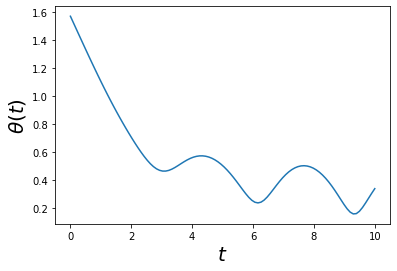

In [31]:
tt = np.linspace(0,10,100)
aa = smp.lambdify([t], theta)(tt)
plt.plot(tt, aa)
plt.xlabel('$t$', fontsize=20)
plt.ylabel(r'$\theta(t)$', fontsize=20)
plt.show

### Vector Integrals

In [32]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [33]:
smp.Integral(r)

Integral(Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]]), t)

In [34]:
smp.Integral(r).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

###### In some cases the integral cannot be evaluated symbolically; Resort to solve it numerically

In [35]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [36]:
smp.Integral(r)

Integral(Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]]), t)

In [37]:
smp.Integral(r).doit()

Matrix([
[                Integral(exp(t**2)*cos(t)**3, t)],
[gamma(1/4)*lowergamma(1/4, t**4)/(16*gamma(5/4))],
[                     sqrt(3)*atan(sqrt(3)*t/3)/3]])

In [38]:
r_num = smp.lambdify([t], r)
quad_vec(r_num, 0, 4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

## Arclength

$$ L = \int_a^b \sqrt{(dx)^2 +(dy)^2 +(dz)^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2} \space dt $$

##### Example

Find the arclength of $\langle 0,t,t^2 \rangle$ from $t=0$ to $t=1$

In [39]:
r = smp.Matrix([0,t,t**2])
r

Matrix([
[   0],
[   t],
[t**2]])

In [40]:
smp.integrate(smp.diff(r,t).norm(), (t,0,1))

asinh(2)/4 + sqrt(5)/2

In [41]:
r = smp.Matrix([smp.exp(t), smp.sin(t), t**4])
r

Matrix([
[exp(t)],
[sin(t)],
[  t**4]])

# Partial & Directional Derivatives

In [42]:
x, y, z = smp.symbols('x y z')

 **Example:** Calculate $ \frac{\partial f}{\partial x} $ and $ \frac{\partial f}{\partial y} $ of $ f(x,y) = y^2 \sin(x+y) $

In [43]:
f = y**2 * smp.sin(x+y)
f

y**2*sin(x + y)

In [44]:
smp.diff(f, x)

y**2*cos(x + y)

In [45]:
smp.diff(f, y)

y**2*cos(x + y) + 2*y*sin(x + y)

##### More Complicated Integrals such as:

$$ \frac{\partial^3 f}{\partial x \partial y^2 } $$

In [46]:
smp.diff(f, y, y, x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

# Multivariable Chain Rule

In [47]:
t = smp.symbols('t')
x, y, z, w, v = smp.symbols('x y z w v', cls=smp.Function)

x = x(t)
y = y(t)
z = z(t)
w = w(x, y, z)
w

w(x(t), y(t), z(t))

In [48]:
smp.diff(w, t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

In [49]:
w1 = x**2+smp.exp(y)*smp.sin(z)

### Gradients

$$ \nabla f $$

In [50]:
C = CoordSys3D('')

In [53]:
f = C.x*smp.sin(C.y)
f

.x*sin(.y)

In [54]:
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [57]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

$$ g(x, y) = x^2 -xy $$

In [59]:
g = C.x**2 - C.x*C.y
g

.x**2 - .x*.y

In [60]:
gradient(g)

(2*.x - .y)*.i + (-.x)*.j

In [61]:
gradient(g).to_matrix(C)

Matrix([
[2*.x - .y],
[      -.x],
[        0]])

In [64]:
gradient(g).to_matrix(C).subs([(C.y, 1)]).subs([(C.x, 2)])

Matrix([
[ 3],
[-2],
[ 0]])

# Directional Derivatives

$$ D_{\vec{u}} f = \nabla f \cdot \vec{u} $$

In [65]:
u = 4*C.i - 3*C.j + 2*C.k
u = u.normalize()
u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [66]:
gradient(f).dot(u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29

# Extreme Values and Saddle Points

Extreme values of Multivariable function $f(x,y)$ can occur at:

(1) $\quad$ Boundary points of the domain of $f$

(2) $\quad$ Critical points $(a,b)$ such that $f_x(a,b)=0$ and $f_y(a,b)=0$

Let $ \quad D = 
          \begin{vmatrix}
            f_{xx} & f_{xy} \\
            f_{yx} & f_{yy}
          \end{vmatrix}
    = f_{xx}f_{yy} - (f_{xy})^2 $

so $\quad D(a,b) = f_{xx}(a,b)f_{yy}(ab) - (f{xy}(a,b))^2$

(i) $\quad$ if $D>0$ and $f_{xx}(a,b) > 0$, then $f(a,b)$ is a local minimum

(ii) $\quad$ if $D>0$ and $f_{xx}(a,b) < 0$, then $f(a,b)$ is a local maximum

(iii) $\quad$ if $D<0$, then $f(a,b)$ is a saddle point

(iv) $\quad$ if $D=0$, then the situation is inconclusive

In [68]:
x, y = smp.symbols('x y', real=True)

In [100]:
f = x**3 + 3*x*y +y**3
f

x**3 + 3*x*y + y**3

Find the critical points:

In [101]:
solns = smp.solve([smp.diff(f,x), smp.diff(f,y)])
solns

[{x: -1, y: -1}, {x: 0, y: 0}]

In [102]:
solns[0]

{x: -1, y: -1}

In [103]:
solns[1]

{x: 0, y: 0}

In [104]:
solns[0][x]

-1

In [105]:
solns[0][y]

-1

In [107]:
fxx = smp.diff(f,x,x)
fyy = smp.diff(f,y,y)
fxy = smp.diff(f,x,y)

In [109]:
test = fxx*fyy - fxy**2
test.subs([(x,-1),(y,-1)])

27

In [110]:
fxx.subs([(x, -1), (y, -1)])

-6

# Lagrange Multipliers Method

Minimize or Maximize $f(x,y,z)$ subject to the constraint $g(x,y,z) = k$

**Hint:** This requires solving both $\nabla f = \lambda \nabla g$ and $g(x,y,z)=k$

Example: A space probe has the shape of an ellipsoid $4x^2 + y^2 + 4z^2 = 16$ and after being exposed to the sun for a while, the temperature on its surface is given by the function $T(x,y,z)=8x^2 +4yz -16z +600$. Find point on the surface where the temperature would be hottest.

In [111]:
C = CoordSys3D('')

In [129]:
lam = smp.symbols('\lambda')
lam

\lambda

In [138]:
g = 4*C.x**2 + C.y**2 + 4*C.z**2 - 16
f = 8*C.x**2 + 4*C.y*C.z - 16*C.z + 600

In [132]:
eq1 = gradient(f)-lam*gradient(g)
eq1 = eq1.to_matrix(C)
eq1

Matrix([
[   -8*.x*\lambda + 16*.x],
[    -2*.y*\lambda + 4*.z],
[4*.y - 8*.z*\lambda - 16]])

In [131]:
eq2=g
sols = smp.solve([eq1,eq2])
sols

[{.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2},
 {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)},
 {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)},
 {.x: 0, .y: 4, .z: 0, \lambda: 0},
 {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}]

In [140]:
for sol in sols:
    print(f.subs(sol).evalf())

642.666666666667
641.569219381653
558.430780618347
600.000000000000
642.666666666667


# Multiple Integrals

###### Can rarely be done Symbolically

$$ \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x\ dz\ dy\ dx $$

In [146]:
x, y, z = smp.symbols('x y z')

In [147]:
f=x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

1/8

In [149]:
from scipy.integrate import tplquad
f = lambda z, y, x: x*np.exp(-y)*np.cos(z)
tplquad(f, 0, 1, lambda x: 0, lambda x: 1-x**2, lambda x, y: 3, lambda x, y: 4-x**2-y**2)[0]

-0.09109526451447894

# Integral and Vector Fields

## Line Integrals (Scalar)

Given $\vec{r} (t) = \langle g(t), h(t), k(t) \rangle$. Then the line integral of $f(x,y,z)$ along the curve is defined by 

$$ \int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t)) | d \vec{r}/dt | dt $$

In [152]:
t = smp.symbols('t', real=True)
x, y, z, f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
r = smp.Matrix([x,y,z])
f = f(x,y,z)

In [154]:
integrand = f*smp.diff(r, t).norm()
integrand

sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t))

###### Example:
Suppose that $\vec{r}(t) = \langle \cos(t), \sin(t), t \rangle$ and $f(x,y,z) = 2xy + \sqrt{z}$. Calculate the length of the curve from $t=0$ to $t=2 \pi$